# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [3]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.shape

(81937, 15)

In [5]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values=['Unknown','UNKNOWN','unknown'])

In [6]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog liscenced in NYC. `Animal Name` is the dog's name. `Owner Zip Code` is the zipcode of the dog's owner.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

What is the most popular dog breed in each zipcode? Which zipcodes have the most gaurd trained dogs per capita? In which zip codes do dogs live the longest?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [7]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

I went back and added unknown as an NA value

In [8]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [9]:
df['Animal Name'].value_counts()

Animal Name
Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: count, Length: 13717, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [10]:
df[df['Animal Name'].str.lower().str.contains('matt',na=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
1038,10463,Mattingly,F,NaN,Toy Pomeranian,BROWN,BLACK,NaN,2003-01-01,Yes,No,Yes,2014-11-29 10:58:02.820,2014-11-29,2017-11-29
1266,11211,Mattie,M,Beagle,NaN,White,Black,Brown,2014-07-01,Yes,NaN,Yes,2014-12-13 17:04:00.157,2014-12-13,2019-12-13
6303,10462,Matthew Mattie,F,Chihuahua,NaN,BLACK,WHITE,NaN,2009-12-01,Yes,No,No,2015-05-07 15:39:30.607,2015-05-07,2016-06-04
6787,11375,MATTY,M,"Poodle, Miniature",NaN,WHITE,TAN,NaN,2002-01-01,Yes,No,Yes,2015-05-11 22:23:54.823,2015-05-11,2016-04-29
9500,10025,MATTY,F,Chihuahua,NaN,WHITE,BROWN,NaN,2009-01-01,Yes,No,Yes,2015-05-29 06:45:58.737,2015-05-29,2016-06-11
10873,11370,MATTHEW,M,Poodle,NaN,White,NaN,NaN,2005-01-01,Yes,No,Yes,2015-06-05 11:31:31.887,2015-06-05,2016-06-13
11699,11357,Matty Hambrock,M,Cavalier King Charles Spaniel,NaN,Brown,White,NaN,2009-04-01,Yes,NaN,Yes,2015-06-09 17:43:13.840,2015-06-09,2016-06-09
13462,11206,Hope Matthews,F,Yorkshire Terrier,NaN,BLACK,BROWN,NaN,2013-02-01,Yes,No,Yes,2015-06-16 14:18:37.773,2015-06-16,2016-06-18
15237,11367,MATTEO,M,Cocker Spaniel,NaN,BLACK,WHITE,NaN,2005-11-01,Yes,No,Yes,2015-06-23 11:48:32.330,2015-06-23,2016-07-30
15850,10128,Mattingly Feinbloom,F,Wheaton Terrier,NaN,WHITE,NaN,NaN,2006-11-01,Yes,No,Yes,2015-06-25 15:18:19.737,2015-06-25,2016-07-12


13, sorta

In [11]:
len(df[df['Animal Name'].str.capitalize() == 'Max'])

256

In [12]:
len(df[df['Animal Name'].str.capitalize() == 'Maxwell'])

13

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [14]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df.loc[df['Guard or Trained'].isna(),'Guard or Trained'] = 'No'

In [17]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [19]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [20]:
#Dataset was from 2016 so I'm calculating how old they were in 2016
df['age'] = 2016 - df['year']

In [21]:
df['age'].describe()

count    30000.000000
mean         6.712433
std          4.066803
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         32.000000
Name: age, dtype: float64

The median age is 6 years, while the mean is 6.7years. The max is 32, which is totally unrealistic, which means there might be some rows in the dataset for dogs that have since passed away.

<Axes: >

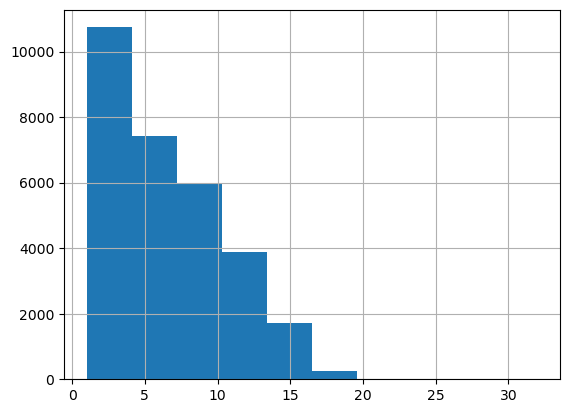

In [22]:
df['age'].hist()

# Joining data together

In [23]:
zipcodes = pd.read_csv('zipcodes-neighborhoods.csv')

In [24]:
zipcodes.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [25]:
merged = pd.merge(df,zipcodes,left_on='Owner Zip Code', right_on='zip', how='left')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [26]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts()

Animal Name
Bella                   22
Max                     21
Rocky                   20
Princess                15
Lucky                   15
                        ..
BAILEY                   1
Spice Shiloh Carwell     1
Jackie E.                1
SIMONA                   1
toby                     1
Name: count, Length: 2029, dtype: int64

In [27]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts()

Animal Name
Max          46
Bella        45
Charlie      42
Rocky        36
Lucky        32
             ..
EMMIE         1
Jimmi         1
Clifford      1
Amanda        1
Beckett       1
Name: count, Length: 4536, dtype: int64

In [28]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts()

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
           ..
Jogi        1
Peeby       1
Carly       1
Caddock     1
KILO        1
Name: count, Length: 1381, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [43]:
merged.groupby('neighborhood')['Primary Breed'].value_counts()

neighborhood  Primary Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Basset Hound                    1
              Soft Coated Wheaten Terrier     1
              Old English Sheepdog            1
              Newfoundland                    1
              Tibetan Spaniel                 1
Name: count, Length: 3987, dtype: int64

In [46]:
merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby('neighborhood').head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [ ]:
#This method lacks rigor because it doesn't take into account sample size

In [91]:
temp_df = df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True,sort=False).reset_index()

In [98]:
temp_df[temp_df['Spayed or Neut'] == 'No'].sort_values('proportion', ascending=False).head(15)

,Primary Breed,Spayed or Neut,proportion
275,Mudi,No,1.000000
265,"Mastiff, Tibetan",No,1.000000
160,Dogo Argentino,No,1.000000
398,Treeing Tennessee Brindle,No,1.000000
228,Karelian Bear Dog,No,1.000000
233,Kooikerhondje,No,1.000000
96,Canaan Dog,No,1.000000
180,French Spaniel,No,1.000000
174,Fila Brasileiro,No,1.000000
307,Polish Hound,No,1.000000


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

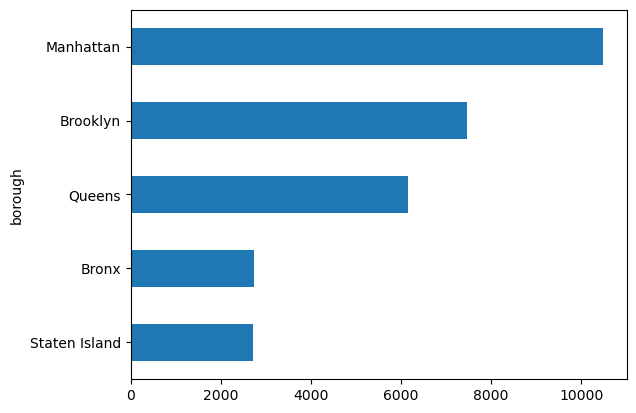

In [51]:
merged['borough'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [60]:
pops = pd.read_csv('boro_population.csv')
pops

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [76]:
percap = pd.merge(merged['borough'].value_counts(), pops, on='borough')

In [71]:
percap['dogs per capita'] = percap['count'] / percap['population']

<Axes: ylabel='borough'>

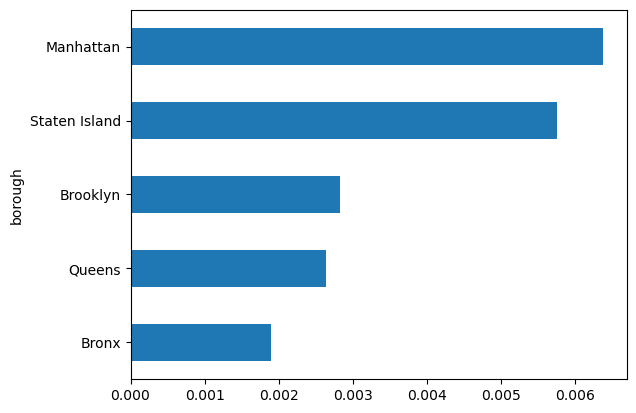

In [75]:
percap.set_index('borough')['dogs per capita'].sort_values().plot(kind='barh')

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='borough,Primary Breed'>

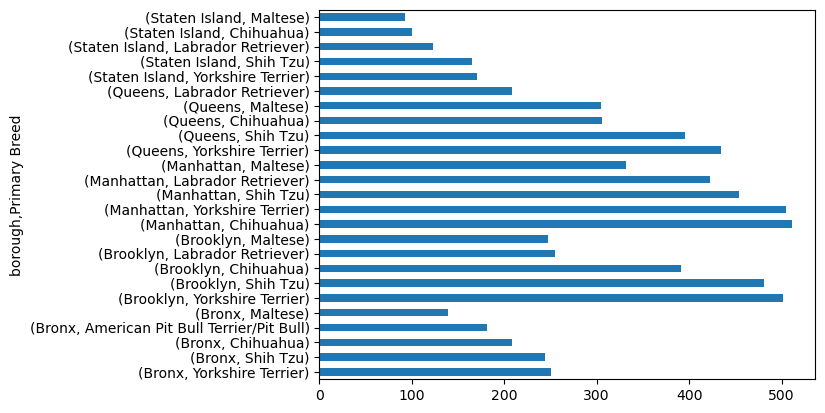

In [57]:
merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [58]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999433
Yes    0.000567
Name: proportion, dtype: float64